<a href="https://colab.research.google.com/github/Yunhua468/Stochastic-Opetimization/blob/franz/problem5_3_fixed_markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import random
from collections import deque
from collections import Iterable
import matplotlib.pyplot as plt

random.seed(42)

# Problem 5.3

## Underlying markov process

$$\mathbb{P}(\xi_{n+1}=1|\xi_n=0,\theta)=p_{0,1}(\theta)$$
$$\mathbb{P}(\xi_{n+1}=1|\xi_n=1,\theta)=p_{1,1}(\theta)$$

In [13]:
def markov_xi(p01=0.5, p11=0.5):
  # generator of underlying markov process
  # may run indefinetely 
  # keeps the state
  last_state = 0
  current_state = None
  while True:
    if last_state == 0:
      if random.random() < p01:
        current_state = 1
      else:
        current_state = 0
    else:
        if random.random() < p11:
          current_state = 1
        else:
          current_state = 0
    last_state = current_state
    yield current_state

In [14]:
def take(generator, n):
  # take n samples from the generator
  for i in range(n):
    yield next(generator)

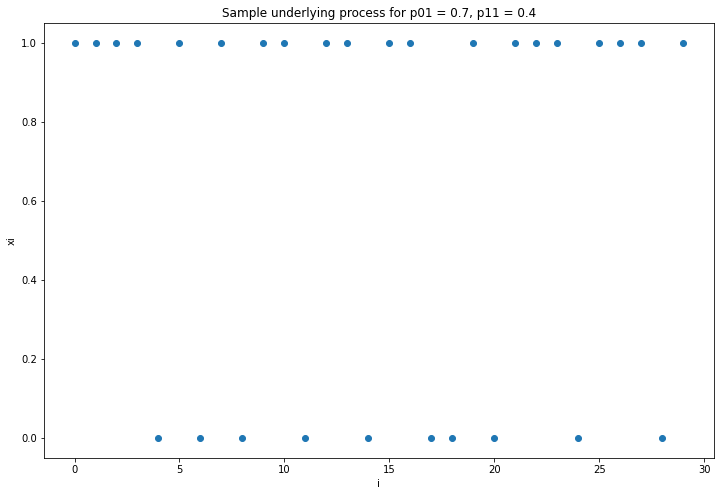

In [15]:
p01 = 0.7
p11 = 0.4
xi = markov_xi(p01=p01, p11=p11)
y = list(take(xi, n=30))
x = list(range(len(y)))
plt.figure(figsize=(12, 8))
plt.title('Sample underlying process for p01 = {}, p11 = {}'.format(p01, p11))
plt.plot(x, y, 'o')
plt.xlabel('i')
plt.ylabel('xi')
plt.show()

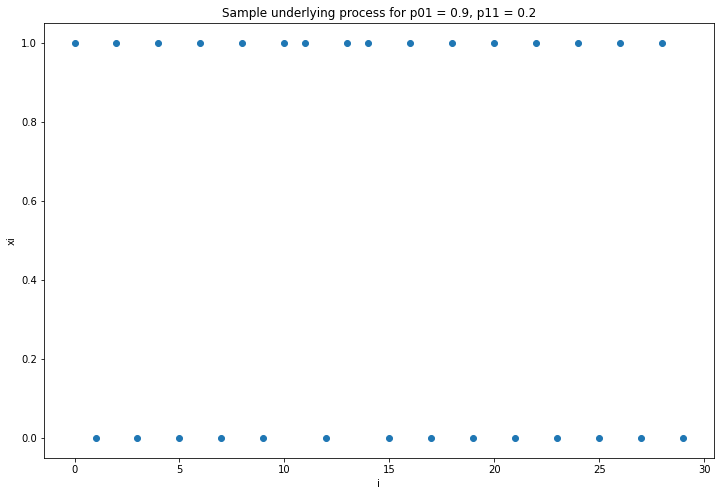

In [16]:
p01 = 0.9
p11 = 0.2
xi = markov_xi(p01=p01, p11=p11)
y = list(take(xi, n=30))
x = list(range(len(y)))
plt.figure(figsize=(12, 8))
plt.title('Sample underlying process for p01 = {}, p11 = {}'.format(p01, p11))
plt.plot(x, y, 'o')
plt.xlabel('i')
plt.ylabel('xi')
plt.show()

# Feedback function 

In [17]:
def feedback(xi, K, alpha):
  assert K > 0
  assert isinstance(xi, Iterable)
  return 200*sum(take(xi, n=K)) - K*alpha

# Stochastic approximation

In [23]:
def approximate(xi, epsilon, K=1, alpha=120, theta0 = 0.5, iterations=100):
  theta = theta0
  thetas = []
  for n in range(iterations):
    theta += epsilon(n)*feedback(xi, K=K, alpha=alpha)
    thetas.append(theta)
  return thetas

# Fixed $\epsilon$

In [24]:
epsilon = lambda n: 0.001

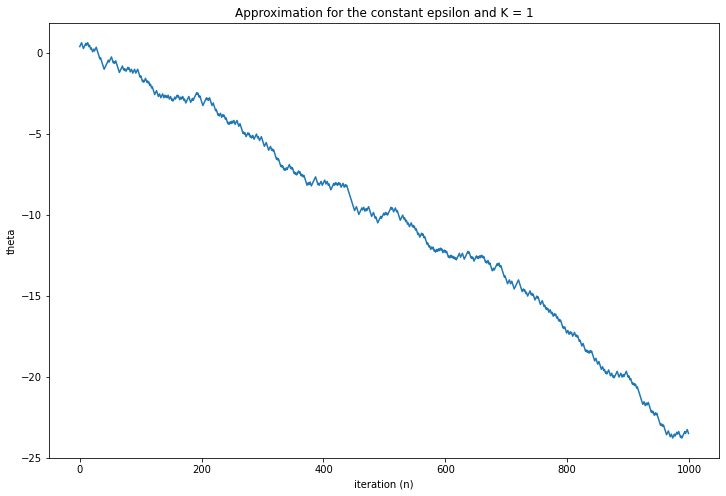

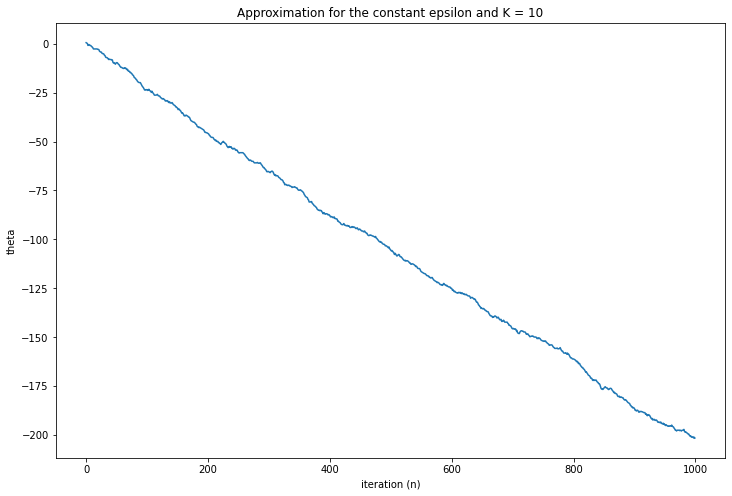

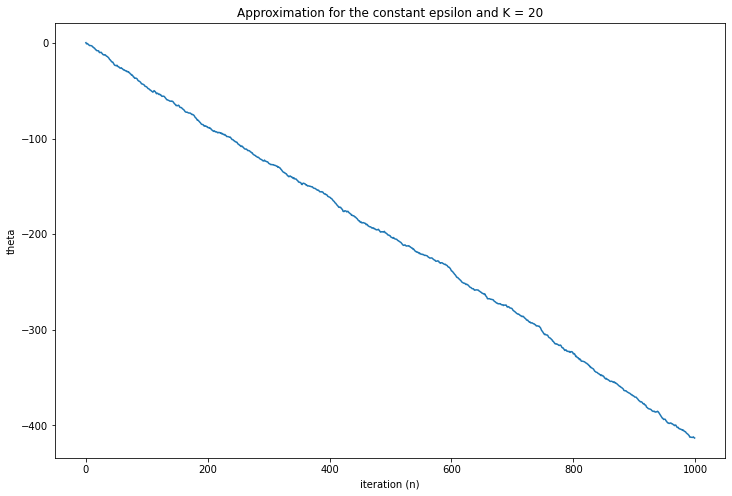

In [25]:
for K in [1, 10, 20]:
  random.seed(42)
  xi = markov_xi(p01=0.5, p11=0.5)
  thetas = approximate(xi, epsilon, K=K, iterations=1000)
  ns = list(range(len(thetas)))

  plt.figure(figsize=(12, 8))
  plt.title('Approximation for the constant epsilon and K = {}'.format(K))
  plt.plot(ns, thetas)
  plt.xlabel('iteration (n)')
  plt.ylabel('theta')
  plt.show()

# $\epsilon = \mathcal{O}(\frac{1}{n})$

In [26]:
epsilon = lambda n: 1 / (n+1.0)

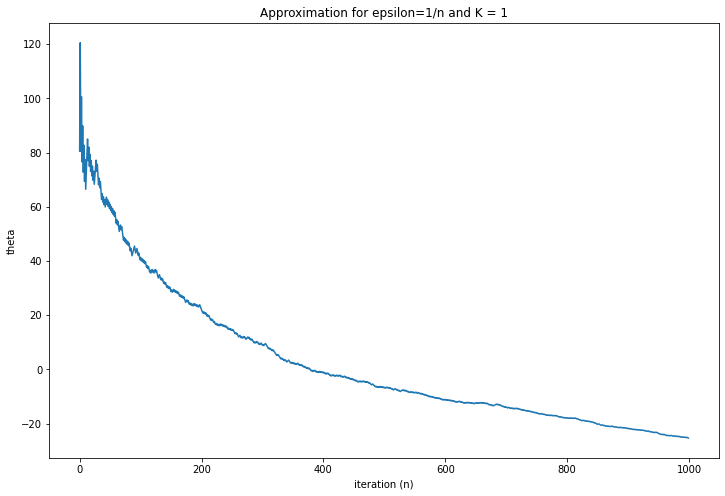

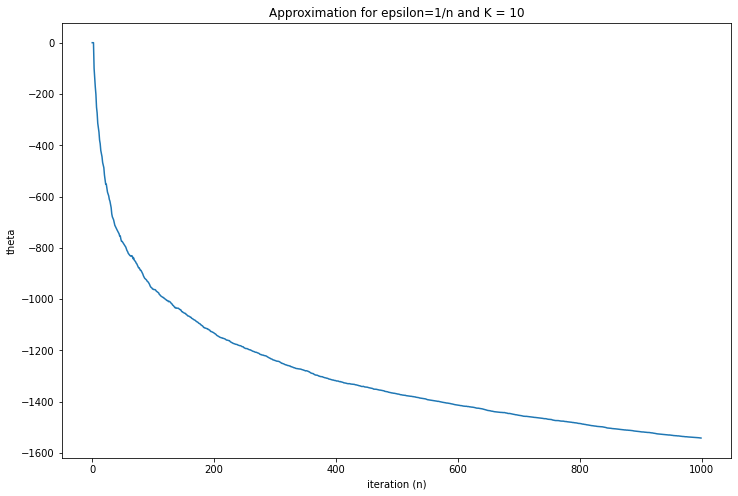

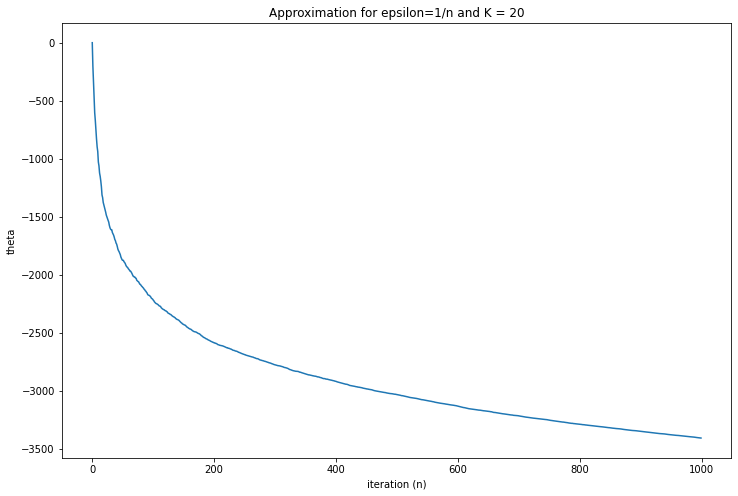

In [27]:
for K in [1, 10, 20]:
  random.seed(42)
  xi = markov_xi(p01=0.7, p11=0.2)
  thetas = approximate(xi, epsilon, K=K, iterations=1000)
  ns = list(range(len(thetas)))

  plt.figure(figsize=(12, 8))
  plt.title('Approximation for epsilon=1/n and K = {}'.format(K))
  plt.plot(ns, thetas)
  plt.xlabel('iteration (n)')
  plt.ylabel('theta')
  plt.show()